### Exemplo 1 - análise de dados - uso do Bitly para encurtar endereços de sites oficiais dos EUA (.gov .mil)

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

In [2]:
#carregando os dados os dados que vai ser usando em formato json
caminho = './datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(caminho)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [3]:
#Exibindo as zonas de tempo que usa o bitly para sites do gov
frame = pd.DataFrame(records)
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [4]:
#limpando os dados , retirnao dos tz que tem nan ou unknow
clean_tz =  frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [5]:
#Exibindo as zonas que mais usam o bitly
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

<AxesSubplot:>

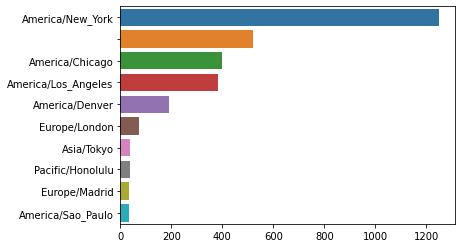

In [6]:
#exibidno o gráfico com os time zone que mais usam o bitly
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [7]:
#pegando o nome do browser usado
#pegando o primeiro nome que aparece, nesse caso é usado o split
#frame.a.dropna retira todos os campos que estão vazios
#x.split()[0] quebra a string em todos os lugares que tem o espaço vazios
# e depois retorna a primeira string que está na ṕsição 0

results = pd.Series([x.split()[0] for x in frame.a.dropna()])

results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [8]:
#os 10 mais usados
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

<AxesSubplot:>

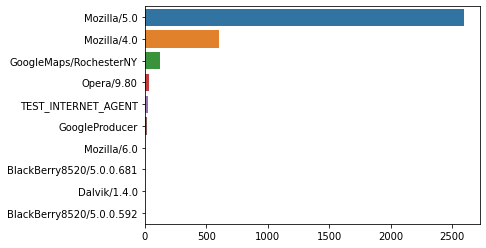

In [9]:
subset = results.value_counts()[:10]

sns.barplot(y=subset.index, x=subset.values)

<AxesSubplot:>

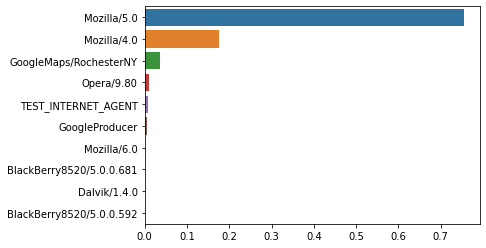

In [10]:
#fazendo a normalização dos dados para melhor visualizar
subset = results.value_counts()[:10]
total = results.value_counts().sum()
sns.barplot(y=subset.index, x=(subset.values/total))

In [11]:
#verificando o tipo de sistema operacional que está sendo usado 
#primeiro vamos coletar apenas os dados que tem nome, ficando de fora todos
#os nan
cframe = frame[frame.a.notnull()]

In [12]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
cframe['os'][:5]

<ipython-input-12-fdec0b9f11c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [15]:
#agrupar por time_zone e sistema operacional
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0
